# Romeo y Julieta

¿Alguna ves te has preguntado si estarás para siempre sintiendo lo mismo por esa persona? ¿Y si te dijera que es posible modelar según el comportamiento de ambos enamorados de forma tal que se puede predecir si para un tiempo largo van a estar juntos o van a separarse?

Aunque no es posible hacer esto para situaciones de la vida real por ser un problema multifactorial, con ciertas simplificaciones podemos modelar qué pasría en cierto tiempo $t$ si dos enamorados con cierta personalidad se llegan a encontrar...


Analizaremos la historia de amor de Romeo y Julieta.  


Para modelarlos matemáticamente comenzamos estableciendo que:  

$R$ y $J$ son los sentimientos de Romeo y Julieta respectivamente

Si R ó J > 0  -->  El sentimiento es positivo, amor
   R ó J = 0  -->  El sentimiento es nulo,     indiferencia
   R ó J < 0  -->  El sentimiento es negativo, odio
   
   
El cambio del sentimiento de Romeo o Julieta con respecto al tiempo se denota como:

\begin{align} \frac{\mathrm{d}R}{\mathrm{d}t} &= Romeo \end{align}

\begin{align} \frac{\mathrm{d}J}{\mathrm{d}t} &= Julieta \end{align}  

Como el sentimiento de Romeo y Julieta puede depender tanto de ellos mismos como de la otra persona, para concoer cómo cambia con respecto al tiempo, proponemos las ecuaciones diferenciales

\begin{align} \frac{\mathrm{d}R}{\mathrm{d}t} &= aR + bJ \end{align}

\begin{align} \frac{\mathrm{d}J}{\mathrm{d}t} &= cR + dJ \end{align}  


Donde a, b , c y d son constantes cuyo significado es el siguiente

a / d --> Es el grado en el que Romeo/Julieta se alientan por sus propios sentimientos. "Inercia de comportamiento"
b / c --> Es el grado en el que Romeo/Julieta se alienta por los sentimientos de Julieta/Romeo. "Función de influencia"

De esta forma, tenemos 4 posibles personalidades

-Cuando $a > 0 ,  b > 0$ __El Motivado:__ Es alentado por sus propios sentimientos y por los de julieta

-Cuando $a > 0 ,  b < 0$ __El narcisista:__ Es alentado por sus propios sentimientos pero al ver que julieta lo ama demasiado su enamoramiento baja

-Cuando $a < 0 ,  b > 0$ __El Cauteloso:__ Por sí mismo no siente mucho,se reprime, pero su amor aumenta si la otra persona lo corresponde, si no lo corresponde entonces se retira.

-Cuando $a > 0 ,  b < 0$ __El Hermitaño:__ Por sí mismo le desagrada la otra persona y si la otra persona lo ama entonces también le desagrada. Si lo odian entonces se siente bien.

Para saber cómo termina la historia de Romeo y Julieta dadas sus condiciones iniciales (cómo se conocieron) así como sus personalidades (el signo y el valor de los coeficientes a, b, c y d) haremos un análisis de los espacios fase ...



Populating the interactive namespace from numpy and matplotlib
El sistema tiene un punto fijo en  0,0


[(0, 0)]

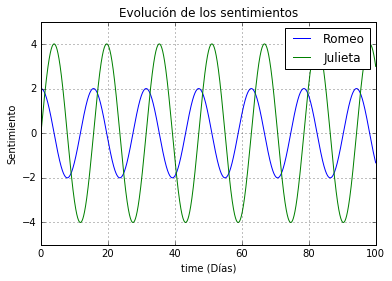

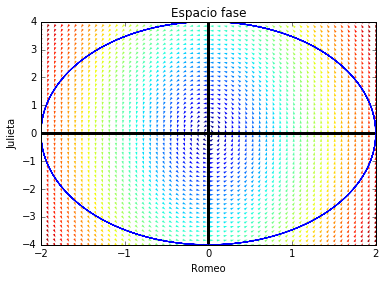

In [60]:
#Importamos las librerías

%pylab inline
import numpy as n                         #matemáticas
import pylab as p                         #Graficador
import scipy.integrate as integrate       #Resolver ecn diferenciales

#Establecemos nuestras ecuaciones diferenciales, para cada una se hace en forma de función con las variables como atributos
def dr(r, j):
    return a*r + b*j                     # 1)Modelo original lineal
    #return j*(1-j)                       # 2)Modelo No lineal  ; usar sólo 5 dias
    #return a*r + b*j*(1-j*j)             # Dinámica sensible a el espaciado del mallado, probar la precisión del cálculo con 0.1 0.01 y 0.001probar la precisión del cálculo con 0.1 0.01 y 0.001
    

def dj(r, j):
    return c*r + d*j                     # 1)Modelo original lineal
    #return n.sin(r)                      # 2)Modelo No lineal ; usar sólo 5 dias
    #return c*r*(1-r*r) + d*j             # Dinámica sensible a el espaciado del mallado, probar la precisión del cálculo con 0.1 0.01 y 0.001


#efinimos el cálculo de las derivadas
def derivs(state, t):
    #print t, state
    r, j = state       # Romeo and Julieta
    deltar = dr(r, j)  # Cambio en el sentimiento de Romeo
    deltaj = dj(r, j)  # Cambio en el sentimiento de Julieta
    return deltar, deltaj


#Establecemos los coeficientes de nuestras ecuaciones
a, b = 0.0, -0.2       # Coeficientes para la ecuación de Romeo
c, d = 0.8, 0.0       # Coeficientes para la ecuación de Julieta

# Condiciones iniciales: Al conocerse fue: >0 buena su impresión, <0 mala su impresión, =0 indiferente 
r0 = 2
j0 = 0

#Nos da la línea del tiempo en el formato (inicio, fin, el aumento)
t = n.arange(0.0, 100, 0.01)

#Gurdamos las condiciones inicales en nuestro vector y0
y0 = [r0, j0]  # El vector inicial de estado [romeo, julieta]

#Resolevmos las ecuaciones y las guardamos en la matriz Y
y = integrate.odeint(derivs, y0, t)

#Extraemos la solución por cada una de las variables
r = y[:,0]  # Extraemos la solución para Romeo
j = y[:,1]  # Extraemos la solución para Julieta






#Graficamos las soluciones

p.figure()

#Graficar la dinámica de Romeo y Julieta
p.plot(t, r, label='Romeo')
p.plot(t, j, label='Julieta')
p.xlabel('time (Días)')
p.ylabel('Sentimiento')
p.title('Evolución de los sentimientos')
p.grid()
p.legend()
p.savefig('Romeo&Julieta.png', dpi=150)


#Imprimir la trayectoria en el espacio fase
p.figure()
p.plot(r, j)
p.xlabel('Romeo')
p.ylabel('Julieta')
p.title('Espacio fase')


#Imprimir con quiver el espacio vectorial de fase

# Definimos los mmáximos y mínimos de los vectores
rmax = 1 * r.max()
jmax = 1 * j.max()
rmin = 1 * r.min()
jmin = 1 * j.min()

#Creamos el número de puntos comenzando con el mínimo, el máximo y el número de puntos que habrá en el mallado
#R, F = n.meshgrid(n.arange(-2, rmax), n.arange(-2, fmax))
x = n.linspace(rmin, rmax, 50)
y = n.linspace(jmin, jmax, 50)

#Creamos el mallado
R, J  = n.meshgrid(x, y) 

#Calculamos las trayectorias de los vectores con la información de las ecn diferenciales
dR = dr(R, J)
dJ = dj(R, J)

# Normalizamos los vectores
M = (n.hypot(dR, dJ))                        
M[ M == 0] = 1.                              
dR /= M                                      
dJ /= M

#Graficamos los vectores
p.quiver(R, J, dR, dJ, M, pivot='mid')
#Dibujamos las nullclines
p.contour(R, J, dR, levels=[0], linewidths=3, colors='black')
p.contour(R, J, dJ, levels=[0], linewidths=3, colors='black')

#Además de aparecerlos en el Jupyter, los guardamos en la carpeta de trabajo
p.savefig('Espacio Fase de Romeo&Julieta.png', dpi=150)

#p.show()



fp = []

def find_fixed_points(ran):
    for r in range(ran):
        for j in range(ran):
            if ((dr(r,j) == 0) and (dj(r,j) == 0)):
                fp.append((r,j))
                print('El sistema tiene un punto fijo en  %s,%s' % (r,j))
    return fp

find_fixed_points(10)


# Probando diferentes personalidades

#### 2 Motivados

$a=0.0$  $b=0.2$  $c=0.8$  $d=0.0$

#### Narcisista y Motivado

$a=0.0$ $b=-0.2$ $c=0.8$ $d=0.0$

#### 2 Narcisitas

$a=0.0$ $b=-0.2$ $c=0.8$ $d=-0.1$

#### Narcisista y Motivado

$a=0.0$ $b=-0.2$ $c=0.8$ $d=0.1$


# ¿Los opuestos se atraen?

Los dos amantes son opuestos en su comportamiento

$c=-b$  $d=-a$

### Motivado y Hermitaño
$ab>0$


### Narcisita y cauteloso
$ab<0$

### Comportamientos Iguales
c=b y d=a

# El código compactado para resolver una ecuación diferencial

El sistema tiene un punto fijo en  0,0


[(0, 0)]

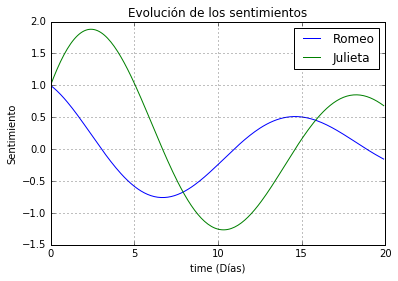

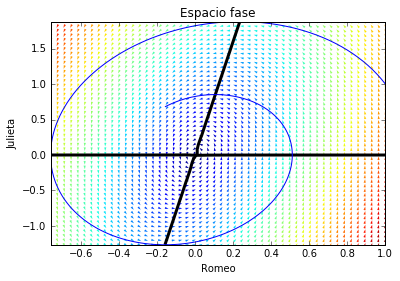

In [64]:
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *


a, b = 0.0, -0.2       # Coeficientes para la ecuación de Romeo
c, d = 0.8, -0.1         # Coeficientes para la ecuación de Julieta

def loveeq(state, t):
    r, j = state
    dr = a*r + b*j
    dj = c*r + d*j
    return [dr, dj]

t = arange(0, 20, 0.1)
#t = n.arange(0.0, 10, 0.01)
init_state = [1, 1]
state = odeint(loveeq, init_state, t)

r = state[:, 0]
j = state[:, 1]

############################################################################################################
#Graficamos las soluciones

p.figure()

#Graficar la dinámica de Romeo y Julieta
p.plot(t, r, label='Romeo')
p.plot(t, j, label='Julieta')
p.xlabel('time (Días)')
p.ylabel('Sentimiento')
p.title('Evolución de los sentimientos')
p.grid()
p.legend()
p.savefig('Romeo&Julieta.png', dpi=150)


#Imprimir la trayectoria en el espacio fase
p.figure()
p.plot(r, j)
p.xlabel('Romeo')
p.ylabel('Julieta')
p.title('Espacio fase')


#Imprimir con quiver el espacio vectorial de fase

# Definimos los mmáximos y mínimos de los vectores
rmax = 1 * r.max()
jmax = 1 * j.max()
rmin = 1 * r.min()
jmin = 1 * j.min()

#Creamos el número de puntos comenzando con el mínimo, el máximo y el número de puntos que habrá en el mallado
#R, F = n.meshgrid(n.arange(-2, rmax), n.arange(-2, fmax))
x = n.linspace(rmin, rmax, 50)
y = n.linspace(jmin, jmax, 50)

#Creamos el mallado
R, J  = n.meshgrid(x, y) 

#Calculamos las trayectorias de los vectores con la información de las ecn diferenciales
dR = dr(R, J)
dJ = dj(R, J)

# Normalizamos los vectores
M = (n.hypot(dR, dJ))                        
M[ M == 0] = 1.                              
dR /= M                                      
dJ /= M

#Graficamos los vectores
p.quiver(R, J, dR, dJ, M, pivot='mid')
#Dibujamos las nullclines
p.contour(R, J, dR, levels=[0], linewidths=3, colors='black')
p.contour(R, J, dJ, levels=[0], linewidths=3, colors='black')

#Además de aparecerlos en el Jupyter, los guardamos en la carpeta de trabajo
p.savefig('Espacio Fase de Romeo&Julieta.png', dpi=150)

#p.show()



fp = []

def find_fixed_points(ran):
    for r in range(ran):
        for j in range(ran):
            if ((dr(r,j) == 0) and (dj(r,j) == 0)):
                fp.append((r,j))
                print('El sistema tiene un punto fijo en  %s,%s' % (r,j))
    return fp

find_fixed_points(10)


